# Î™©Ìëú

keywordÍ∞Ä Ìè¨Ìï®Îêú NÍ∞úÏùò reddit ÏµúÏã† Ìè¨Ïä§Ìä∏Î•º Í∞ÄÏ†∏ÏôÄÏÑú Î¨∏Ïû•Ïùò sentiment analiysisÎ•º ÏàòÌñâ  
keywordÏóê ÎåÄÌïú reddit Ïú†Ï†ÄÎì§Ïùò ÎåÄÎûµÏ†ÅÏù∏ Ïù¥ÎØ∏ÏßÄ ÌååÏïÖÏóê ÎèÑÏõÄÏù¥ Îê®  

# ÏùòÏ°¥ÏÑ±

In [1]:
# !pip install praw pyyaml
# !pip install transformers
# !pip install torch==2.3.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# WordCloud Í¥ÄÎ†®
from wordcloud import WordCloud
from PIL import Image
# ÌÖçÏä§Ìä∏ ÌååÏã±
import nltk
# Ï†ïÍ∑úÌëúÌòÑÏãù - ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
import re
# WordCloud - ÏÉÅÏúÑ NÍ∞ú ÎπàÏ∂ú Î¨∏Ïûê
from collections import Counter
# Python Reddit Api Wrapper
import praw
# For Inject configuration
import yaml
from datetime import datetime

In [3]:
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
def reddit_search_api(keyword: str, limit: 10):
    conf = None
    with open('resources/application.yml') as f:
        conf = yaml.safe_load(f)['reddit']


    # Reddit Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
    reddit = praw.Reddit(
        client_id=conf['client_id'],     # Reddit Ïï±Ïùò client_id
        client_secret=conf['client_secret'], # Reddit Ïï±Ïùò client_secret
        user_agent=conf['user_agent'],   # ÏûêÏã†ÏùÑ ÏãùÎ≥ÑÌïòÎäî user_agent
        # username='YOUR_USERNAME',       # (ÏòµÏÖò) Reddit ÏÇ¨Ïö©Ïûê Ïù¥Î¶Ñ
        # password='YOUR_PASSWORD'        # (ÏòµÏÖò) Reddit ÎπÑÎ∞ÄÎ≤àÌò∏
    )

    posts = []
    # Ïù∏Í∏∞ ÏÑúÎ∏åÎ†àÎîßÏùò Ïù∏Í∏∞ Ìè¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
    subreddit = reddit.subreddit('All')
    for post in subreddit.search(keyword, limit=limit):
        posts.append({
            'title': post.title,
            'score': post.score,
            'id': post.id,
            'url': post.url,
            'num_comments': post.num_comments,
            'created': post.created,
            'body': post.selftext
        })
        print(f"Ï†úÎ™©: {post.title}, ÏóÖÎ≥¥Ìä∏ Ïàò: {post.score}, ÎßÅÌÅ¨: {post.url}")

    df = pd.DataFrame(posts)
    print(df)
    df.to_json(f'reddit-{keyword}-{str(datetime.now())}.json', force_ascii=False)


In [5]:
keyword = 'Hyundai'
reddit_search_api(keyword, 1000)

Ï†úÎ™©: Why do Americans hate Hyundai but Australia's like Hyundai?, ÏóÖÎ≥¥Ìä∏ Ïàò: 97, ÎßÅÌÅ¨: https://www.reddit.com/r/CarsAustralia/comments/1bx1336/why_do_americans_hate_hyundai_but_australias_like/
Ï†úÎ™©: Why should I NOT buy a Hyundai? , ÏóÖÎ≥¥Ìä∏ Ïàò: 120, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/1aunvj2/why_should_i_not_buy_a_hyundai/
Ï†úÎ™©: Why are Hyundais never recommended?, ÏóÖÎ≥¥Ìä∏ Ïàò: 140, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/15z12vp/why_are_hyundais_never_recommended/
Ï†úÎ™©: What happened to Hyundai/Kia?, ÏóÖÎ≥¥Ìä∏ Ïàò: 0, ÎßÅÌÅ¨: https://www.reddit.com/r/cars/comments/18t7k2z/what_happened_to_hyundaikia/
Ï†úÎ™©: Are Kia & Hyundai still bad brands?, ÏóÖÎ≥¥Ìä∏ Ïàò: 55, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/1auh1e5/are_kia_hyundai_still_bad_brands/
Ï†úÎ™©: Why do you think people buy Hyundai/Kia's ?, ÏóÖÎ≥¥Ìä∏ Ïàò: 383, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/17c1bsu/why_do_you_think_p

In [6]:
import glob
import os

# pathÏóêÏÑú Ìå®ÌÑ¥Ïóê Îß§Ïπ≠ÎêòÎäî ÌååÏùºÏùÑ ÌåêÎã§Ïä§Î°ú ÏùΩÏñ¥ÏÑú Î≥ëÌï© ÌõÑ Î∞òÌôò
def read_reddit_json_files(directory_path, keyword):
    # ÌååÏùº Ìå®ÌÑ¥ Ï†ïÏùò
    file_pattern = os.path.join(directory_path, f'reddit-{keyword}-*.json')
    
    # Ìå®ÌÑ¥Ïóê ÎßûÎäî ÌååÏùº Î™©Î°ù Ï∞æÍ∏∞
    json_files = glob.glob(file_pattern)
    
    # JSON ÌååÏùºÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    if not json_files:
        print(f"No files found for keyword '{keyword}' in directory '{directory_path}'.")
        return None
    
    # ÌååÏùºÏùÑ ÏùΩÏñ¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
    dfs = []
    for file in json_files:
        try:
            df = pd.read_json(file)
            dfs.append(df)
        except ValueError as e:
            print(f"Error reading {file}: {e}")
    
    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÌïòÎÇòÎ°ú Î≥ëÌï©
    if dfs:
        combined_df = pd.concat(dfs, ignore_index=True)
        return combined_df
    else:
        print("No valid JSON files found.")
        return None


In [7]:
# ÏòàÏãú ÏÇ¨Ïö©
directory_path = ''  # JSON ÌååÏùºÎì§Ïù¥ ÏûàÎäî ÎîîÎ†âÌÑ∞Î¶¨ Í≤ΩÎ°ú
df = read_reddit_json_files(directory_path, keyword)

if df is not None:
    print(df.head(2))

                                               title  score       id  \
0  Why do Americans hate Hyundai but Australia's ...     98  1bx1336   
1                   Why should I NOT buy a Hyundai?     120  1aunvj2   

                                                 url  num_comments  \
0  https://www.reddit.com/r/CarsAustralia/comment...           252   
1  https://www.reddit.com/r/whatcarshouldIbuy/com...           264   

      created                                               body  
0  1712372553  Just curious- \n\nAfter doing travelling I not...  
1  1708351006                                     Do your worst   


In [8]:
df['text'] = df['title'] + df['body']

In [9]:
# ÌóàÍπÖÌéòÏù¥Ïä§, sentiment-analysis Î™®Îç∏ ÏÇ¨Ïö©
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
# Í∞êÏ†ï Î∂ÑÏÑù ÏàòÌñâ Ìï®Ïàò Ï†ïÏùò
def analyze_sentiment(text):
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']

# ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï∂îÍ∞Ä, Í∞Å ÌÖçÏä§Ìä∏ Í∏∏Ïù¥Îäî ÏµúÎåÄ 512Ïûê.
df[['sentiment', 'confidence']] = df['text'].apply(lambda x: pd.Series(analyze_sentiment(x[:512])))

df

/Users/admin/data-engineering-course/missions/W2/sentiment-analysis/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


title  score       id  \
0    Why do Americans hate Hyundai but Australia's ...     98  1bx1336   
1                     Why should I NOT buy a Hyundai?     120  1aunvj2   
2                  Why are Hyundais never recommended?    142  15z12vp   
3                        What happened to Hyundai/Kia?      0  18t7k2z   
4                  Are Kia & Hyundai still bad brands?     56  1auh1e5   
..                                                 ...    ...      ...   
473  Hyundai subsidiary used child labor at Alabama...   1195   w5b7af   
474  Hyundai Pony EV, Grandeur EV, N Vision 74(Conc...   2510   w0fc0c   
475  Hyundai boss admits surprise at success of Ion...    726  127dc5i   
476  Genesis' New Standalone Dealerships Leave Hyun...   1239  12z6zd4   
477  Almost 52,000 USD out-the-door for a Hyundai S...    333  1bqhwqn   

                                                   url  num_comments  \
0    https://www.reddit.com/r/CarsAustralia/comment...           252   
1    https://www.reddit.com/r/whatcarshouldIbuy/com...           264   
2    https://www.reddit.com/r/whatcarshouldIbuy/com...           448   
3    https://www.reddit.com/r/cars/comments/18t7k2z...           151   
4    https://www.reddit.com/r/whatcarshouldIbuy/com...           101   
..                                                 ...           ...   
473  https://www.reuters.com/world/us/exclusive-hyu...           201   
474              https://www.reddit.com/gallery/w0fc0c           147   
475  https://www.autocar.co.uk/car-news/new-cars/hy...           272   
476  https://www.motortrend.com/reviews/2022-genesi...           222   
477               https://i.redd.it/loxy9vh9q7rc1.jpeg           281   

        created                                               body  \
0    1712372553  Just curious- \n\nAfter doing travelling I not...   
1    1708351006                                     Do your worst    
2    1692789984  Besides the fuck up with the immobilizer and c...   
3    1703805130  Pre-2015 Hyundai/Kia had a reputation of being...   
4    1708325751  I came across a couple posts recently that con...   
..          ...                                                ...   
473  1658498016                                                      
474  1657973754                                                      
475  1680246802                                                      
476  1682485191                                                      
477  1711691780                                                      

                                                  text sentiment  confidence  
0    Why do Americans hate Hyundai but Australia's ...  POSITIVE    0.991165  
1       Why should I NOT buy a Hyundai? Do your worst   NEGATIVE    0.999687  
2    Why are Hyundais never recommended?Besides the...  NEGATIVE    0.992455  
3    What happened to Hyundai/Kia?Pre-2015 Hyundai/...  NEGATIVE    0.997392  
4    Are Kia & Hyundai still bad brands?I came acro...  NEGATIVE    0.996423  
..                                                 ...       ...         ...  
473  Hyundai subsidiary used child labor at Alabama...  NEGATIVE    0.994401  
474  Hyundai Pony EV, Grandeur EV, N Vision 74(Conc...  POSITIVE    0.995716  
475  Hyundai boss admits surprise at success of Ion...  POSITIVE    0.991310  
476  Genesis' New Standalone Dealerships Leave Hyun...  NEGATIVE    0.999567  
477  Almost 52,000 USD out-the-door for a Hyundai S...  NEGATIVE    0.974281  

[478 rows x 10 columns]

In [10]:
def remove_special_symbol(text): # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

In [11]:
positive = df[df['sentiment']=='POSITIVE']
negative = df[df['sentiment']=='NEGATIVE']

In [12]:
# ÌïòÎÇòÏùò ÌÅ∞ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
positive_texts = ' '.join(positive['text'])
negative_texts = ' '.join(negative['text'])

In [13]:
# ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
positive_symbol_removed_texts = remove_special_symbol(positive_texts)
negative_symbol_removed_texts = remove_special_symbol(negative_texts)

In [14]:
# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
positive_tokens = nltk.word_tokenize(positive_symbol_removed_texts)
negative_tokens = nltk.word_tokenize(negative_symbol_removed_texts)

In [15]:
stopwords = nltk.corpus.stopwords.words('english') # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ ÏÑ∏Ìä∏(ÏÜåÎ¨∏Ïûê)

In [16]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞
positive_stopwords_removed_tokens = [t.lower() for t in positive_tokens if t.lower() not in stopwords]
negative_stopwords_removed_tokens = [t.lower() for t in negative_tokens if t.lower() not in stopwords]

In [17]:
# Ïπ¥Ïö¥ÌÑ∞ ÏÉùÏÑ±( Îã®Ïñ¥ : ÎπàÎèÑÏàò )
positive_count_set = Counter(positive_stopwords_removed_tokens)
negative_count_set = Counter(negative_stopwords_removed_tokens)

In [18]:
N = 500 # ÏÉÅÏúÑ 50Í∞ú Ìï≠Î™©Îßå ÎèÑÏ∂ú
topN_positive_tokens = positive_count_set.most_common(N)
topN_negative_tokens = negative_count_set.most_common(N)

topN_positive_tokens_dict = dict(topN_positive_tokens)
topN_negative_tokens_dict = dict(topN_negative_tokens)

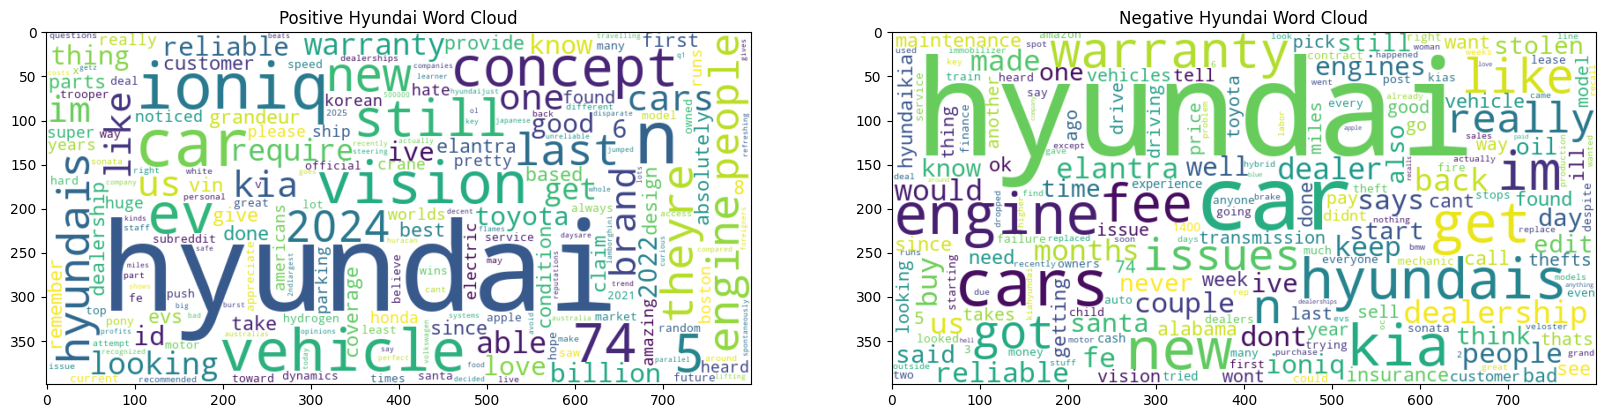

In [19]:
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wc1 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topN_positive_tokens_dict)
wc2 = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topN_negative_tokens_dict)

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(20, 10))

# Ï≤´ Î≤àÏß∏ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 2, 1)
plt.imshow(wc1, interpolation='bilinear')
# plt.axis('off')
plt.title(f'Positive {keyword} Word Cloud')

# Îëê Î≤àÏß∏ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
plt.subplot(1, 2, 2)
plt.imshow(wc2, interpolation='bilinear')
# plt.axis('off')
plt.title(f'Negative {keyword} Word Cloud')

plt.show()

In [ ]:
from flask import Flask, request, jsonify
import pandas as pd
import matplotlib.pyplot as plt

app = Flask(__name__)

def analyze_keyword(keyword):
    reddit_search_api(keyword, 1000)
    directory_path = ''  # JSON ÌååÏùºÎì§Ïù¥ ÏûàÎäî ÎîîÎ†âÌÑ∞Î¶¨ Í≤ΩÎ°ú
    df = read_reddit_json_files(directory_path, keyword)
    df['text'] = df['title'] + df['body']
    df[['sentiment', 'confidence']] = df['text'].apply(lambda x: pd.Series(analyze_sentiment(x[:512])))

    positive = df[df['sentiment']=='POSITIVE']
    negative = df[df['sentiment']=='NEGATIVE']


    # ÌïòÎÇòÏùò ÌÅ∞ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
    positive_texts = ' '.join(positive['text'])
    negative_texts = ' '.join(negative['text'])

    # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    positive_symbol_removed_texts = remove_special_symbol(positive_texts)
    negative_symbol_removed_texts = remove_special_symbol(negative_texts)

    # ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
    positive_tokens = nltk.word_tokenize(positive_symbol_removed_texts)
    negative_tokens = nltk.word_tokenize(negative_symbol_removed_texts)


    stopwords = nltk.corpus.stopwords.words('english') # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ ÏÑ∏Ìä∏(ÏÜåÎ¨∏Ïûê)

    # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    positive_stopwords_removed_tokens = [t.lower() for t in positive_tokens if t.lower() not in stopwords]
    negative_stopwords_removed_tokens = [t.lower() for t in negative_tokens if t.lower() not in stopwords]

    # Ïπ¥Ïö¥ÌÑ∞ ÏÉùÏÑ±( Îã®Ïñ¥ : ÎπàÎèÑÏàò )
    positive_count_set = Counter(positive_stopwords_removed_tokens)
    negative_count_set = Counter(negative_stopwords_removed_tokens)

    N = 500 # ÏÉÅÏúÑ 50Í∞ú Ìï≠Î™©Îßå ÎèÑÏ∂ú
    topN_positive_tokens = positive_count_set.most_common(N)
    topN_negative_tokens = negative_count_set.most_common(N)

    topN_positive_tokens_dict = dict(topN_positive_tokens)
    topN_negative_tokens_dict = dict(topN_negative_tokens)

    return {'positive' : topN_positive_tokens_dict, 'negative' : topN_negative_tokens_dict }

@app.route('/analyze', methods=['POST'])
def analyze():
    keyword = request.json.get('keyword')
    if keyword:
        data = analyze_keyword(keyword)
        return jsonify(data)
    else:
        return jsonify({"error": "No keyword provided"}), 400

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5001)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://10.6.13.145:5001
Press CTRL+C to quit


Ï†úÎ™©: Why do Americans hate Hyundai but Australia's like Hyundai?, ÏóÖÎ≥¥Ìä∏ Ïàò: 100, ÎßÅÌÅ¨: https://www.reddit.com/r/CarsAustralia/comments/1bx1336/why_do_americans_hate_hyundai_but_australias_like/
Ï†úÎ™©: Why should I NOT buy a Hyundai? , ÏóÖÎ≥¥Ìä∏ Ïàò: 119, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/1aunvj2/why_should_i_not_buy_a_hyundai/
Ï†úÎ™©: Why are Hyundais never recommended?, ÏóÖÎ≥¥Ìä∏ Ïàò: 141, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/15z12vp/why_are_hyundais_never_recommended/
Ï†úÎ™©: What happened to Hyundai/Kia?, ÏóÖÎ≥¥Ìä∏ Ïàò: 0, ÎßÅÌÅ¨: https://www.reddit.com/r/cars/comments/18t7k2z/what_happened_to_hyundaikia/
Ï†úÎ™©: Are Kia & Hyundai still bad brands?, ÏóÖÎ≥¥Ìä∏ Ïàò: 55, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/1auh1e5/are_kia_hyundai_still_bad_brands/
Ï†úÎ™©: Why do you think people buy Hyundai/Kia's ?, ÏóÖÎ≥¥Ìä∏ Ïàò: 385, ÎßÅÌÅ¨: https://www.reddit.com/r/whatcarshouldIbuy/comments/17c1bsu/why_do_you_think_

127.0.0.1 - - [10/Jul/2024 18:19:28] "POST /analyze HTTP/1.1" 200 -


Ï†úÎ™©: Digging holes for Trees , ÏóÖÎ≥¥Ìä∏ Ïàò: 15201, ÎßÅÌÅ¨: https://v.redd.it/02cdljfj368d1
Ï†úÎ™©: Harvesting Latex From Trees, ÏóÖÎ≥¥Ìä∏ Ïàò: 14944, ÎßÅÌÅ¨: https://v.redd.it/2u887mb0ll3d1
Ï†úÎ™©: Stop Planting Trees, Says Guy Who Inspired World to Plant a Trillion Trees, ÏóÖÎ≥¥Ìä∏ Ïàò: 227, ÎßÅÌÅ¨: https://www.wired.com/story/stop-planting-trees-thomas-crowther/
Ï†úÎ™©: Why is /r/trees named that?, ÏóÖÎ≥¥Ìä∏ Ïàò: 1875, ÎßÅÌÅ¨: https://www.reddit.com/r/OutOfTheLoop/comments/3igq90/why_is_rtrees_named_that/
Ï†úÎ™©: Lots of trees, ÏóÖÎ≥¥Ìä∏ Ïàò: 270, ÎßÅÌÅ¨: https://www.reddit.com/gallery/17au3ht
Ï†úÎ™©: Trees, ÏóÖÎ≥¥Ìä∏ Ïàò: 3, ÎßÅÌÅ¨: https://www.reddit.com/r/EverAfterFalls/comments/1dps7gs/trees/
Ï†úÎ™©: Trees surrounding house. Could I make Starlink work?, ÏóÖÎ≥¥Ìä∏ Ïàò: 10, ÎßÅÌÅ¨: https://www.reddit.com/gallery/170pd2w
Ï†úÎ™©: Best tree mod?, ÏóÖÎ≥¥Ìä∏ Ïàò: 19, ÎßÅÌÅ¨: https://www.reddit.com/r/SkyrimModsXbox/comments/16m96qm/best_tree_mod/
Ï†úÎ™©: clipping the palm trees, ÏóÖ

127.0.0.1 - - [10/Jul/2024 18:30:54] "POST /analyze HTTP/1.1" 200 -


Ï†úÎ™©: Apple Bill, ÏóÖÎ≥¥Ìä∏ Ïàò: 201, ÎßÅÌÅ¨: https://www.reddit.com/r/hungary/comments/1dqcf43/apple_bill/
Ï†úÎ™©: Apple Juice , ÏóÖÎ≥¥Ìä∏ Ïàò: 17418, ÎßÅÌÅ¨: https://v.redd.it/22oijaoqgtyc1
Ï†úÎ™©: Apple Pay k√°lv√°ria, tapasztalatok?, ÏóÖÎ≥¥Ìä∏ Ïàò: 134, ÎßÅÌÅ¨: https://i.redd.it/uv7hpbrziz8d1.jpeg
Ï†úÎ™©: "Apple" Discussion Megathread, ÏóÖÎ≥¥Ìä∏ Ïàò: 13, ÎßÅÌÅ¨: https://www.reddit.com/r/charlixcx/comments/1d9k3th/apple_discussion_megathread/
Ï†úÎ™©: Apple korai el≈ëfizet√©s kisz√°ml√°z√°s, ÏóÖÎ≥¥Ìä∏ Ïàò: 21, ÎßÅÌÅ¨: https://www.reddit.com/r/hungary/comments/1dp5yv9/apple_korai_el≈ëfizet√©s_kisz√°ml√°z√°s/
Ï†úÎ™©: Is Apple really that bad?, ÏóÖÎ≥¥Ìä∏ Ïàò: 114, ÎßÅÌÅ¨: https://www.reddit.com/r/privacy/comments/14wdlvy/is_apple_really_that_bad/
Ï†úÎ™©: Apple is falling so far behind, ÏóÖÎ≥¥Ìä∏ Ïàò: 279, ÎßÅÌÅ¨: https://www.reddit.com/r/singularity/comments/1asfii1/apple_is_falling_so_far_behind/
Ï†úÎ™©: Megbolondult az Apple Pay, t√∂megesen von le p√©nzt a haszn√°l√≥kt√≥l, ÏóÖÎ≥¥Ìä∏

127.0.0.1 - - [10/Jul/2024 18:32:24] "POST /analyze HTTP/1.1" 200 -
